🔹 Loading dataset...
✅ Dataset loaded successfully!

📋 Showing basic dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Produc

C:\Users\dell\AppData\Local\Temp\ipykernel_11308\827213690.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.values, y=category_profit.index, palette="viridis")


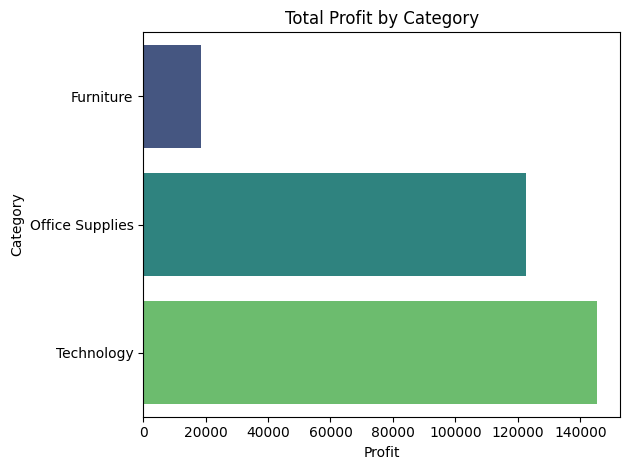


📊 Plotting: Sales and Profit by Region


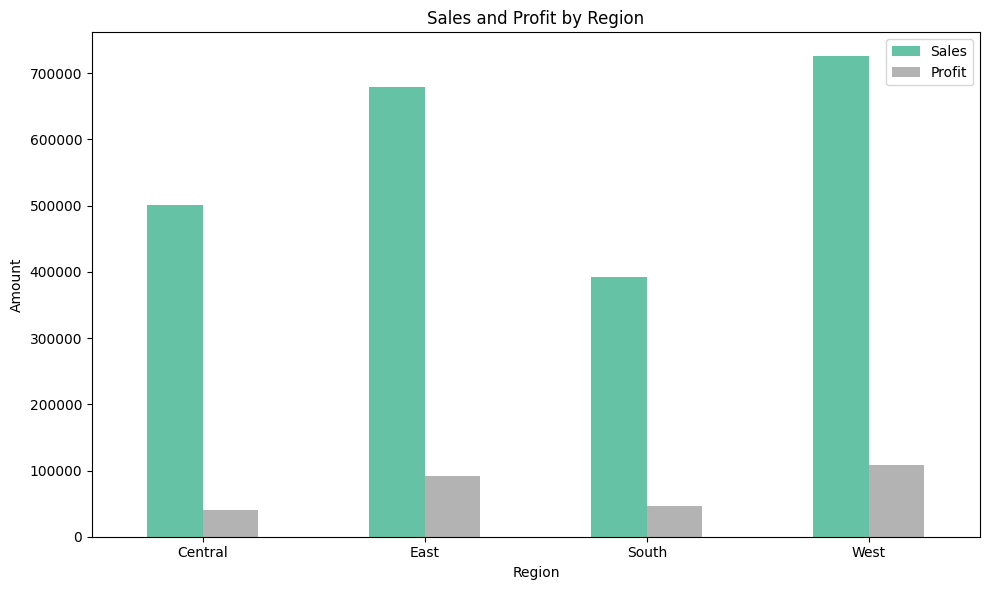


⚠️ High Sales, Low Profit Products:
                                                         Sales     Profit
Product Name                                                             
Cisco TelePresence System EX90 Videoconferencin...  22638.4800 -1811.0784
GBC DocuBind P400 Electric Binding System           17965.0680 -1878.1662
High Speed Automatic Electric Letter Opener         17030.3120  -262.0048
Lexmark MX611dhe Monochrome Laser Printer           16829.9010 -4589.9730
Martin Yale Chadless Opener Electric Letter Opener  16656.2000 -1299.1836
Riverside Palais Royal Lawyers Bookcase, Royale...  15610.9656  -669.5448
Bretford Rectangular Conference Table Tops          12995.2915  -327.2331
Cubify CubeX 3D Printer Double Head Print           11099.9630 -8879.9704
Chromcraft Bull-Nose Wood Oval Conference Table...   9917.6400 -2876.1156
Bush Advantage Collection Racetrack Conference ...   9544.7250 -1934.3976
Tennsco Single-Tier Lockers                          9158.2960  -825.7480
C

C:\Users\dell\AppData\Local\Temp\ipykernel_11308\827213690.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.set_index("Order Date").resample("M")[["Sales", "Profit"]].sum()


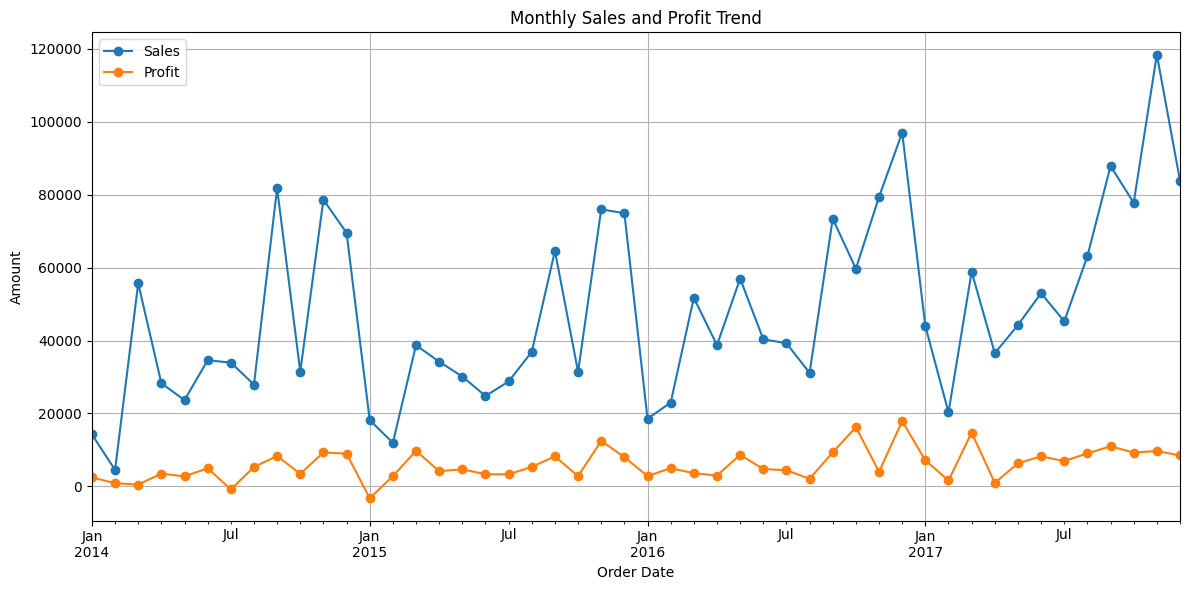


📈 Sales and Profit by Segment:
                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785

📊 Plotting: Sales and Profit by Segment


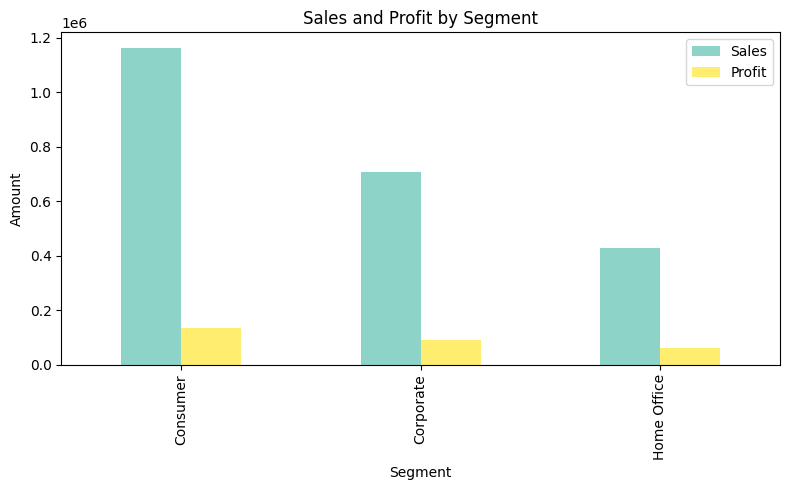


📊 Plotting: Discount vs Profit


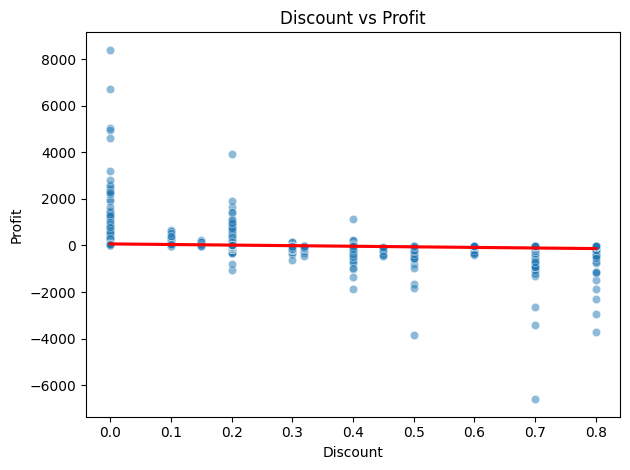


📊 Plotting: Profit by Category and Region (Heatmap)


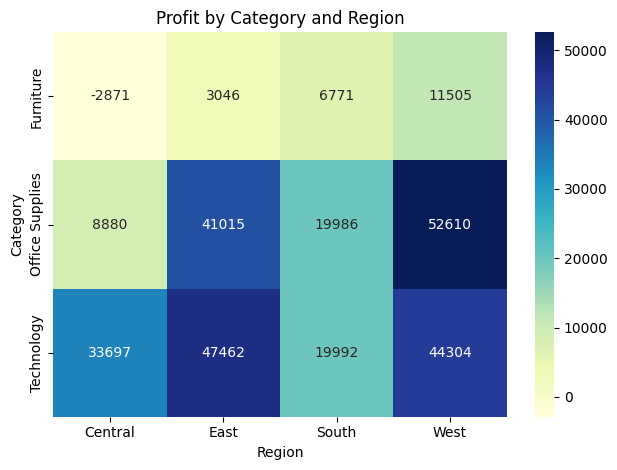


📌 Final Recommendations:
1. Focus marketing on West and East regions – highest profit zones.
2. Optimize or discontinue high-loss products (e.g., 3D Printers, some furniture).
3. Leverage strong technology product performance.
4. Audit discounts to avoid reducing profits.
5. Boost volume in profitable segments like Technology and Corporate buyers.
6. Use monthly trend data to prepare for high-sales periods.



In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("🔹 Loading dataset...")
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
print("✅ Dataset loaded successfully!\n")

print("📋 Showing basic dataset information:")
print(df.info())

print("\n📌 First 5 rows of the dataset:")
print(df.head())

print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

print("\n🔎 Exploring unique values in key columns:")
print("Segment:", df['Segment'].unique())
print("Category:", df['Category'].unique())
print("Sub-Category:", df['Sub-Category'].unique())
print("Region:", df['Region'].unique())

print("\n📈 Basic statistics for Sales and Profit:")
print(df[['Sales', 'Profit']].describe())

print("\n💰 Top 10 Profitable Products:")
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)
print(top_products)

print("\n❌ Top 10 Loss-Making Products:")
loss_products = df.groupby("Product Name")["Profit"].sum().sort_values().head(10)
print(loss_products)

print("\n📍 Sales and Profit by Region:")
region_perf = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False)
print(region_perf)

print("\n📦 Total Quantity Sold by Category:")
category_sales = df.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
print(category_sales)

print("\n📊 Plotting: Total Profit by Category")
category_profit = df.groupby("Category")["Profit"].sum().sort_values()
sns.barplot(x=category_profit.values, y=category_profit.index, palette="viridis")
plt.title("Total Profit by Category")
plt.xlabel("Profit")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

print("\n📊 Plotting: Sales and Profit by Region")
region_data = df.groupby("Region")[["Sales", "Profit"]].sum()
region_data.plot(kind="bar", figsize=(10,6), colormap="Set2")
plt.title("Sales and Profit by Region")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n⚠️ High Sales, Low Profit Products:")
product_perf = df.groupby("Product Name")[["Sales", "Profit"]].sum()
suspicious_products = product_perf[(product_perf["Sales"] > 5000) & (product_perf["Profit"] < 0)]
print(suspicious_products.sort_values(by="Sales", ascending=False))

print("\n🕒 Converting 'Order Date' to datetime and analyzing monthly trends...")
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_data = df.set_index("Order Date").resample("M")[["Sales", "Profit"]].sum()

print("\n📊 Plotting: Monthly Sales and Profit Trend")
monthly_data.plot(figsize=(12,6), marker='o', title="Monthly Sales and Profit Trend")
plt.ylabel("Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n📈 Sales and Profit by Segment:")
segment_perf = df.groupby("Segment")[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False)
print(segment_perf)

print("\n📊 Plotting: Sales and Profit by Segment")
segment_perf.plot(kind="bar", figsize=(8,5), colormap="Set3", title="Sales and Profit by Segment")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

print("\n📊 Plotting: Discount vs Profit")
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5)
sns.regplot(data=df, x="Discount", y="Profit", scatter=False, color="red")
plt.title("Discount vs Profit")
plt.tight_layout()
plt.show()

print("\n📊 Plotting: Profit by Category and Region (Heatmap)")
heatmap_data = df.pivot_table(index="Category", columns="Region", values="Profit", aggfunc="sum")
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Profit by Category and Region")
plt.tight_layout()
plt.show()

# Final recommendations summary
summary = """
📌 Final Recommendations:
1. Focus marketing on West and East regions – highest profit zones.
2. Optimize or discontinue high-loss products (e.g., 3D Printers, some furniture).
3. Leverage strong technology product performance.
4. Audit discounts to avoid reducing profits.
5. Boost volume in profitable segments like Technology and Corporate buyers.
6. Use monthly trend data to prepare for high-sales periods.
"""
print(summary)
